In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from scipy.spatial.distance import cosine

Using TensorFlow backend.


In [2]:
def extract_face(filename, required_size = (224,224)):
    pixels = plt.imread(filename)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

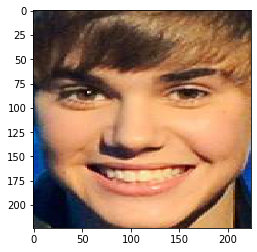

In [6]:
pixels = extract_face('Image/justin_bieber.jpg')
plt.imshow(pixels)
plt.show()

In [7]:
model = VGGFace(model = 'resnet50')
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_12:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier_2/Softmax:0' shape=(None, 8631) dtype=float32>]


In [8]:
pixels = extract_face('Image/justin_bieber.jpg')
pixels = pixels.astype('float32')
samples = np.expand_dims(pixels, axis = 0)
samples = preprocess_input(samples, version = 2)
model = VGGFace(model = 'resnet50')
yhat = model.predict(samples)
results = decode_predictions(yhat)
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1] * 100))

b' Justin_Bieber': 80.232%
b' Maia_Mitchell': 11.003%
b' Halil_Erg\xc3\xbcn': 1.506%
b' Kristinia_DeBarge': 0.439%
b' Igor_Akinfeev': 0.324%
